применим аугментации к встроенному датасету FashionMNIST

100%|██████████| 26.4M/26.4M [00:01<00:00, 19.9MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 300kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.49MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 11.7MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



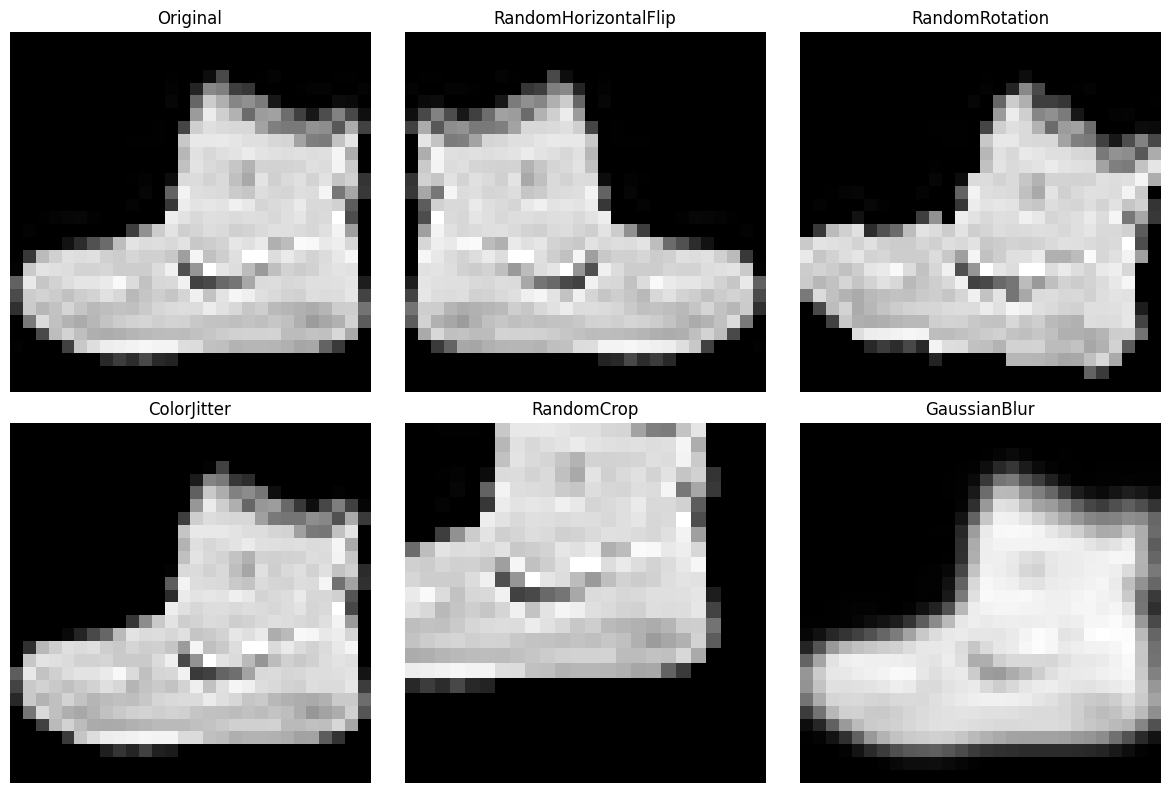

In [1]:
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
import matplotlib.pyplot as plt
from PIL import Image

# Загрузка оригинального изображения
original_dataset = FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
original_image, _ = original_dataset[0]

# Преобразуем тензор обратно в PIL Image для аугментаций
original_image_pil = transforms.ToPILImage()(original_image)

# Определение отдельных аугментаций
augmentations = {
    "Original": transforms.Compose([transforms.ToTensor()]),
    "RandomHorizontalFlip": transforms.Compose([transforms.RandomHorizontalFlip(p=1.0), transforms.ToTensor()]),
    "RandomRotation": transforms.Compose([transforms.RandomRotation(degrees=30), transforms.ToTensor()]),
    "ColorJitter": transforms.Compose([transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5), transforms.ToTensor()]),
    "RandomCrop": transforms.Compose([transforms.RandomCrop(size=(24, 24), padding=4), transforms.ToTensor()]),
    "GaussianBlur": transforms.Compose([transforms.GaussianBlur(kernel_size=3), transforms.ToTensor()]),
}

# Функция для отображения сетки изображений
def show_augmentations(original_image_pil, augmentations, n_rows=2, n_cols=3):
    plt.figure(figsize=(12, 8))  # Увеличиваем размер фигуры для лучшей визуализации
    for i, (name, augmentation) in enumerate(augmentations.items()):
        augmented_image = augmentation(original_image_pil)  # Применяем аугментацию
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(augmented_image.permute(1, 2, 0).squeeze(), cmap='gray')
        plt.title(name)
        plt.axis('off')
    plt.tight_layout()  # Улучшаем расположение изображений
    plt.show()

# Применение аугментаций и отображение
show_augmentations(original_image_pil, augmentations)

Делаем пайплайн для всех аугментаций сразу

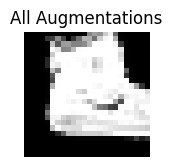

In [10]:
all_augmentations_pipeline = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1.0),
    transforms.RandomRotation(degrees=30),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5),
    transforms.RandomCrop(size=(24, 24), padding=4),
    transforms.GaussianBlur(kernel_size=3),
    transforms.ToTensor()
])


augmented_image_all = all_augmentations_pipeline(original_image_pil)

def show_augmentations(original_image_pil, augmentations, n_rows=3, n_cols=3):

    # изображение с применением всех аугментаций
    plt.subplot(n_rows, n_cols, len(augmentations) + 1)
    plt.imshow(augmented_image_all.permute(1, 2, 0).squeeze(), cmap='gray')
    plt.title("All Augmentations")
    plt.axis('off')

    plt.tight_layout()
    plt.show()


show_augmentations(original_image_pil, augmentations)

можем сделать следующие выводы:

    RandomHorizontalFlip: Это преобразование помогает модели стать инвариантной к ориентации объектов на изображении. Например, если объект на изображении может быть повернут в любую сторону, модель будет лучше справляться с такими вариациями.

    RandomRotation: Вращение изображения на случайный угол помогает модели лучше распознавать объекты, которые могут быть повернуты под разными углами в реальных условиях.

    ColorJitter: Изменение яркости, контраста и насыщенности помогает модели стать устойчивой к изменениям освещения и цветовых вариаций.

    RandomCrop: Случайное обрезание изображения помогает модели лучше распознавать объекты, которые могут быть частично скрыты или обрезаны.

    GaussianBlur: Размытие изображения помогает модели стать устойчивой к шумам и небольшим искажениям, которые могут возникать в реальных условиях.

В целом, аугментация данных позволяет увеличить вариативность обучающего набора, что способствует улучшению обобщающей способности модели и повышению её устойчивости к различным искажениям и изменениям в данных.